## Logistic Regression


In [8]:
from sklearn.datasets import load_iris
data = load_iris(as_frame=True)
print(list(data))

['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module']


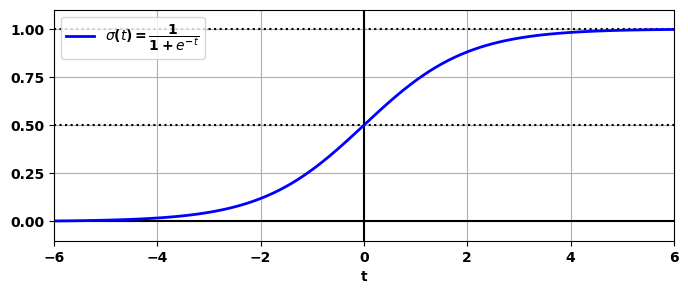

In [7]:
import numpy as np
import matplotlib.pyplot as plt

lim = 6
t = np.linspace(-lim, lim, 100)
sig = 1 / (1 + np.exp(-t))

plt.figure(figsize=(8, 3))

plt.plot([-lim, lim], [0, 0], "k-")
plt.plot([-lim, lim], [0.5, 0.5], "k:")
plt.plot([-lim, lim], [1, 1], "k:")

plt.plot([0, 0], [-1.1, 1.1], "k-")
plt.plot(t, sig, "b-", linewidth=2,
         label=r"$\sigma(t) = \dfrac{1}{1 + e^{-t}}$")
plt.xlabel("t")
plt.legend(loc="upper left")
plt.axis([-lim, lim, -0.1, 1.1])
plt.gca().set_yticks([0, 0.25, 0.5, 0.75, 1])
plt.grid()
plt.show()

In [12]:
data['data'].head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [14]:
data.target.head()

0    0
1    0
2    0
3    0
4    0
Name: target, dtype: int32

In [15]:
data.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [47]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

X = data['data'][['petal width (cm)']].values
y = (data['target_names'][data['target']] ==
     'virginica').astype(int)

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)

LogisticRegression(random_state=42)

In [55]:
np.random.seed(0)
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_predicted = model.predict_proba(X_new)

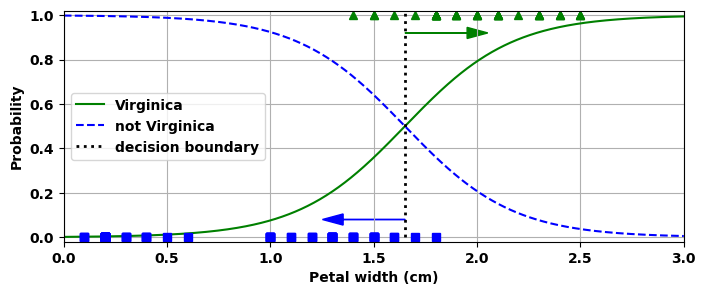

In [88]:
decision_boundary = X_new[y_predicted[:, 1] >= 0.5][0][0]
plt.figure(figsize=(8, 3))

plt.plot(X_new, y_predicted[:, 1], 'g-', label='Virginica')
plt.plot(X_new, y_predicted[:, 0], 'b--', label='not Virginica')
plt.plot([decision_boundary, decision_boundary], [-.1, 1.1],
         'k:', linewidth=2, label='decision boundary')

plt.plot(X_train[y_train == 1], y_train[y_train == 1], 'g^')
plt.plot(X_train[y_train == 0], y_train[y_train == 0], 'bs')


plt.arrow(x=decision_boundary, y=0.08, dx=-0.3, dy=0,
          head_width=0.05, head_length=0.1, fc="b", ec="b")
plt.arrow(x=decision_boundary, y=0.92, dx=0.3, dy=0,
          head_width=0.05, head_length=0.1, fc="g", ec="g")

plt.xlabel("Petal width (cm)")
plt.ylabel("Probability")
plt.legend(loc="center left")
plt.axis([0, 3, -0.02, 1.02])


plt.grid()
plt.show()

In [89]:
decision_boundary

1.6516516516516517

In [90]:
model.predict([[1.5], [2]])

array([0, 1])